In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets



# **–ü—Ä–∏–º–µ—Ä –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¢–∏—Ç–∞–Ω–∏–∫**

In [4]:
df = pd.read_csv('./data/titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**–£–±–æ—Ä–∫–∞ –≤ –¥–∞–Ω–Ω—ã—Ö + feature engineering**

In [5]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1 # —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–≤—É—Ö –¥—Ä—É–≥–∏—Ö
df = df[['Pclass','Sex','Fare','Age','Family_Size', 'Survived']]

df = pd.get_dummies(df, columns=['Sex','Pclass'], dtype='int', drop_first=True) # —Å–æ–∑–¥–∞–µ–º –¥–∞–º–º–∏-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

df['Age'] = df['Age'].fillna(round(df['Age'].mean(), 0))
df

Fare   Age  Family_Size  Survived  Sex_male  Pclass_2  Pclass_3
0     7.2500  22.0            2         0         1         0         1
1    71.2833  38.0            2         1         0         0         0
2     7.9250  26.0            1         1         0         0         1
3    53.1000  35.0            2         1         0         0         0
4     8.0500  35.0            1         0         1         0         1
..       ...   ...          ...       ...       ...       ...       ...
886  13.0000  27.0            1         0         1         1         0
887  30.0000  19.0            1         1         0         0         0
888  23.4500  30.0            4         0         0         0         1
889  30.0000  26.0            1         1         1         0         0
890   7.7500  32.0            1         0         1         0         1

[891 rows x 7 columns]

In [6]:
features = df.columns
features = features.drop('Survived')
features

Index(['Fare', 'Age', 'Family_Size', 'Sex_male', 'Pclass_2', 'Pclass_3'], dtype='object')

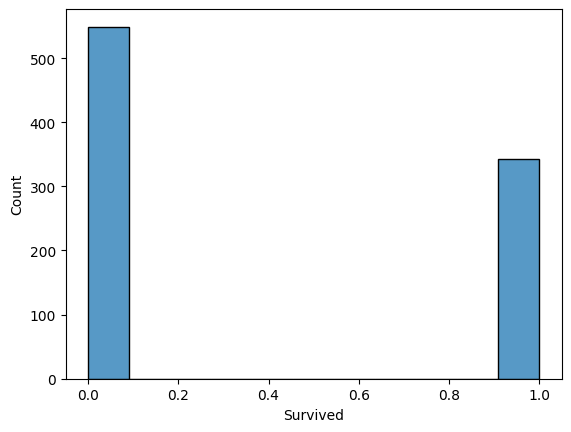

In [ ]:
sns.histplot(df['Survived'])
plt.show()

In [7]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']


**Oversampling –∏–ª–∏ undersampling –¥–ª—è –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏**

In [8]:
X, y = SMOTE().fit_resample(X, y) # –æversampling
# X, y = TomekLinks().fit_resample(X, y) #undersampling

/Users/andreypovaliy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


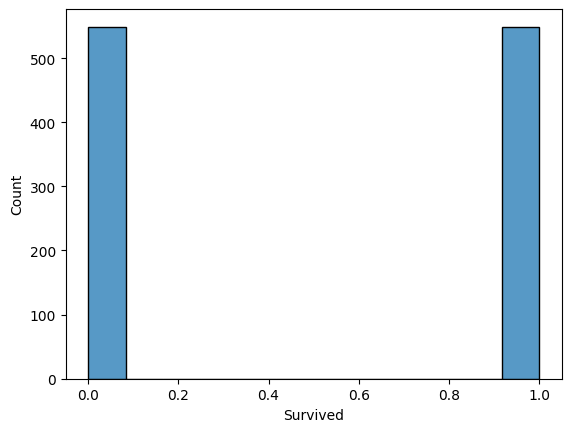

In [9]:
sns.histplot(y)
plt.show()

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**–í–∫–ª—é—á–∞–µ–º —Å—Ç–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é  `stratify` –ø–æ —Ç–∞—Ä–≥–µ—Ç –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `y`**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

## –ê–ª–≥–æ—Ä–∏—Ç–º K-Nearest Neighbors (KNN) –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

KNN (k-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π) ‚Äì —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ–π –∏ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ –ø–æ–Ω—è—Ç–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ —Å—Ç—Ä–æ–∏—Ç —è–≤–Ω–æ–π –º–æ–¥–µ–ª–∏, –∞ –¥–µ–ª–∞–µ—Ç –ø—Ä–æ–≥–Ω–æ–∑—ã, –æ—Å–Ω–æ–≤—ã–≤–∞—è—Å—å –Ω–∞ —Å—Ö–æ–¥—Å—Ç–≤–µ –æ–±—ä–µ–∫—Ç–æ–≤.

‚∏ª

**–ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç KNN?**

	1.	–í—ã–±–∏—Ä–∞–µ–º —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π k.
	2.	–î–ª—è –Ω–æ–≤–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –Ω–∞—Ö–æ–¥–∏–º k –±–ª–∏–∂–∞–π—à–∏—Ö —Ç–æ—á–µ–∫ –∏–∑ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ (–ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é).
	3.	–û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–ª–∞—Å—Å:
	    ‚Ä¢	–ú–∞–∂–æ—Ä–∏—Ç–∞—Ä–Ω–æ–µ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ ‚Äì –æ–±—ä–µ–∫—Ç –ø–æ–ª—É—á–∞–µ—Ç –∫–ª–∞—Å—Å, –∫–æ—Ç–æ—Ä—ã–π –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ —Å—Ä–µ–¥–∏ k —Å–æ—Å–µ–¥–µ–π.
	    ‚Ä¢	–í–∑–≤–µ—à–µ–Ω–Ω–æ–µ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ ‚Äì —Å–æ—Å–µ–¥–∏ —Å –º–µ–Ω—å—à–∏–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º –∏–º–µ—é—Ç –±–æ–ª—å—à–∏–π –≤–µ—Å.
	4.	–ö–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º –Ω–æ–≤—ã–π –æ–±—ä–µ–∫—Ç.

**–ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å KNN?**

‚úÖ –ï—Å–ª–∏ –¥–∞–Ω–Ω—ã—Ö –Ω–µ–º–Ω–æ–≥–æ.

‚úÖ –ï—Å–ª–∏ –≤–∞–∂–Ω–∞ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å (–ø–æ–Ω—è—Ç–Ω–æ, –ø–æ—á–µ–º—É —Ç–∞–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç—Å—è).


---
**‚ùå –ú–∏–Ω—É—Å—ã:**

‚ùå –ú–µ–¥–ª–µ–Ω–Ω—ã–π –Ω–∞ –±–æ–ª—å—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö (–Ω—É–∂–Ω–æ —Ö—Ä–∞–Ω–∏—Ç—å –≤—Å–µ –ø—Ä–∏–º–µ—Ä—ã).

‚ùå –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ –≤—ã–±–æ—Ä–∞–º k –∏ —à—É–º—É.

‚ùå –ü–ª–æ—Ö–æ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –≤—ã—Å–æ–∫–æ–º–µ—Ä–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ (–ø—Ä–æ–∫–ª—è—Ç–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏).

**–û–±—É—á–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏**

In [12]:
k_values = range(1,21)
mean_score = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    mean_score.append(scores.mean())

best_k = k_values[np.argmax(mean_score)]
print(f'Best k={best_k} ; accuracy:{max(mean_score):.3f}')

Best k=7 ; accuracy:0.845


**–ß—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ—Å—Ç—Ä–æ–∏–º boxplot**

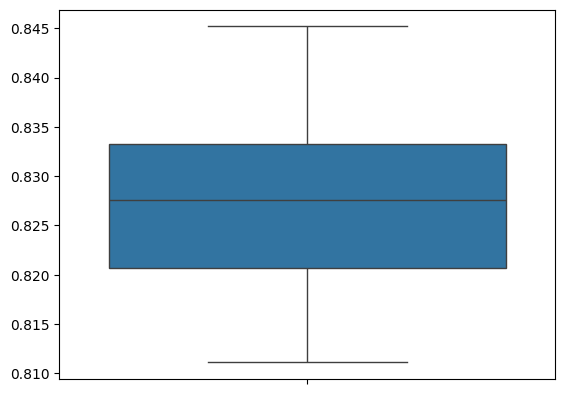

In [13]:
sns.boxplot(mean_score)
plt.show()

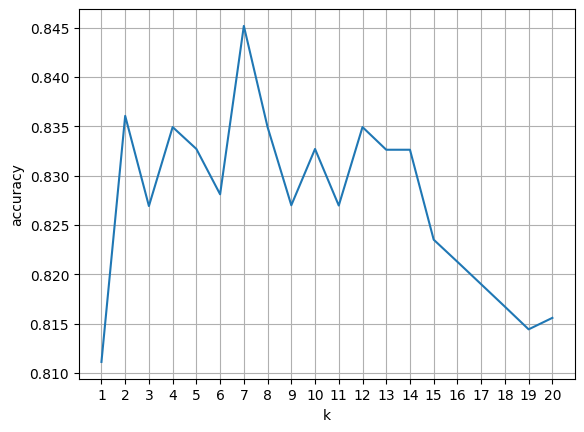

In [14]:
plt.plot(k_values, mean_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

**GridSearch Cross-Validation (–ø–æ–∏—Å–∫ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ)**

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)
# knn = KNeighborsClassifier()

# params = {
#     'n_neighbors': range(1,21),
#     'metric': ['euclidean', 'manhattan']
# }

# gs = GridSearchCV(knn, params, cv=20, scoring='accuracy')
# gs.fit(X_train, y_train)
# print(gs.best_params_)

knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test =  knn.predict(X_test)


# y_pred_train = gs.predict(X_train)
# y_pred_test =  gs.predict(X_test)



## –ú–µ—Ç—Ä–∏–∫–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

–ú–µ—Ç—Ä–∏–∫–∏, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞ –º–∞—Ç—Ä–∏—Ü–µ –æ—à–∏–±–æ–∫ (confusion matrix)

**–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑:**

$TP(True Positive)$ ‚Äì –≤–µ—Ä–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã

$TN (True Negative)$ ‚Äì –≤–µ—Ä–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã

$FP (False Positive)$ ‚Äì –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ (–æ—à–∏–±–æ—á–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–∞–∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ)

$FN (False Negative)$ - –ª–æ–∂–Ω–æ–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ (–æ—à–∏–±–æ—á–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–∞–∫ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ)

**Accuracy (–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏)**

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

	‚Ä¢	–ü–æ–¥—Ö–æ–¥–∏—Ç, –µ—Å–ª–∏ –∫–ª–∞—Å—Å—ã —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã
	‚Ä¢	–ù–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

**Precision (–¢–æ—á–Ω–æ—Å—Ç—å, –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è —Ü–µ–Ω–Ω–æ—Å—Ç—å)**

$$Precision = \frac{TP}{TP + FP}$$

	‚Ä¢	–î–æ–ª—è –≤–µ—Ä–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–∞–∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ
	‚Ä¢	–í–∞–∂–Ω–∞, –µ—Å–ª–∏ FP (–ª–æ–∂–Ω—ã–µ —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏—è) –∫—Ä–∏—Ç–∏—á–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–µ —Ä–∞–∫–∞)

**Recall (–ü–æ–ª–Ω–æ—Ç–∞, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å, TPR)**

$$Recall = \frac{TP}{TP + FN}$$

	‚Ä¢	–î–æ–ª—è –≤–µ—Ä–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö
	‚Ä¢	–í–∞–∂–Ω–∞, –µ—Å–ª–∏ FN –∫—Ä–∏—Ç–∏—á–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–æ–ø—É—Å–∫ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è)

$F1-score$ (–°—Ä–µ–¥–Ω–µ–µ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–æ–µ $Precision$ –∏ $Recall$)

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

	‚Ä¢	–£—á–∏—Ç—ã–≤–∞–µ—Ç –∏ Precision, –∏ Recall
	‚Ä¢	–•–æ—Ä–æ—à–∞ –¥–ª—è –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö


–ö–æ–¥:

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')
print(f'f1 train: {f1_train:.3f}')
print(f'f1 test: {f1_test:.3f}')
print(f'precision train: {precision_train:.3f}')
print(f'precision test: {precision_test:.3f}')
print(f'recall train: {recall_train:.3f}')
print(f'recall test: {recall_test:.3f}')

accuracy train: 0.884
accuracy test: 0.868
f1 train: 0.876
f1 test: 0.864
precision train: 0.940
precision test: 0.893
recall train: 0.820
recall test: 0.836


**–û—Ç—á–µ—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏**

In [ ]:
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.89      0.84      0.86       110

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



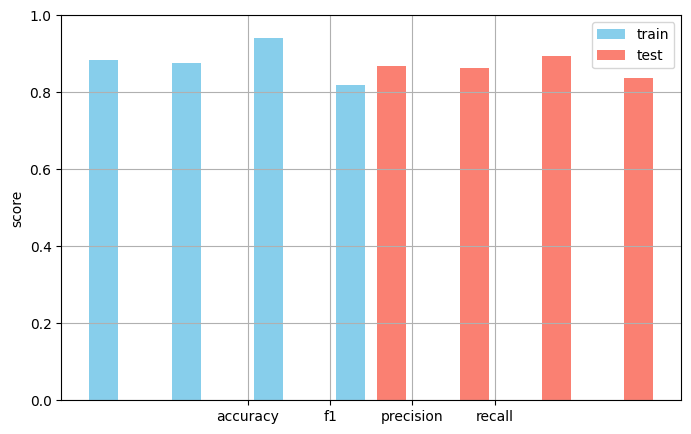

In [ ]:
metrics = ['accuracy', 'f1', 'precision', 'recall']
scores_train = [accuracy_train, f1_train, precision_train, recall_train]
scores_test = [accuracy_test, f1_test, precision_test, recall_test]

x = np.arange(len(metrics))

plt.figure(figsize=(8,5))
width = 0.35
plt.bar(x - width/0.2, scores_train, width=width, label='train', color='skyblue')
plt.bar(x + width/0.2, scores_test, width=width, label='test', color = 'salmon')

plt.xticks(x, metrics)
plt.ylabel('score')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

**–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫**

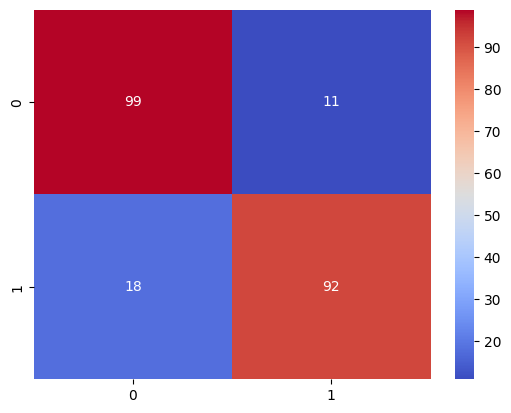

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

**–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è ‚Äî —ç—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, —Ç–æ –µ—Å—Ç—å –∫–æ–≥–¥–∞ –Ω—É–∂–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –ª–∏ –æ–±—ä–µ–∫—Ç –∫ –æ–¥–Ω–æ–º—É –∏–∑ –¥–≤—É—Ö –∫–ª–∞—Å—Å–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ‚Äú–¥–∞‚Äù –∏–ª–∏ ‚Äú–Ω–µ—Ç‚Äù, ‚Äú0‚Äù –∏–ª–∏ ‚Äú1‚Äù, ‚Äú–±–æ–ª–µ–Ω‚Äù –∏–ª–∏ ‚Äú–∑–¥–æ—Ä–æ–≤‚Äù).**


###üìå –û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è:

–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –ø–æ—Ö–æ–∂–∞ –Ω–∞ –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, –Ω–æ –≤–º–µ—Å—Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (–∫–∞–∫, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏ —Ü–µ–Ω –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã), –æ–Ω–∞ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –∫–∞–∫–æ–º—É-—Ç–æ –∫–ª–∞—Å—Å—É.

### –§–æ—Ä–º—É–ª–∞ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:

$$P(Y = 1 | X) = \frac{1}{1 + e^{-(w_0 + w_1 X_1 + w_2 X_2 + ‚Ä¶ + w_n X_n)}}$$

üîπ $w_0, w_1, ‚Ä¶, w_n$ ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –ø–æ–¥–±–∏—Ä–∞–µ–º –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è).

üîπ $X_1, X_2, ‚Ä¶, X_n$ ‚Äî –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—Ñ–∏—á–∏).

üîπ $\sigma(z) = \frac{1}{1 + e^{-z}}$ ‚Äî —Å–∏–≥–º–æ–∏–¥–Ω–∞—è (–ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è) —Ñ—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–≤—Ä–∞—â–∞–µ—Ç –ª—é–±–æ–µ —á–∏—Å–ª–æ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω $(0,1)$.



üìä –ö–∞–∫ –æ–Ω–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç?

	1.	–õ–∏–Ω–µ–π–Ω–∞—è –∫–æ–º–±–∏–Ω–∞—Ü–∏—è –≤—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∫–∞–∫ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è z
	2.	–ü—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è —Å–∏–≥–º–æ–∏–¥–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è, —á—Ç–æ–±—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å z  –≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç 0 –¥–æ 1.
	3.	–ü–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: –µ—Å–ª–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤—ã—à–µ 0.5, –æ—Ç–Ω–æ—Å–∏–º –æ–±—ä–µ–∫—Ç –∫ –∫–ª–∞—Å—Å—É 1, –∏–Ω–∞—á–µ ‚Äî –∫ –∫–ª–∞—Å—Å—É 0.

In [ ]:
log_reg = LogisticRegression(penalty='l2', C=0.9, solver='saga', random_state = 1)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)


accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)



In [ ]:
report_log_reg_train = classification_report(y_train, y_pred_train)
print(report_log_reg_train)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       439
           1       0.81      0.79      0.80       439

    accuracy                           0.81       878
   macro avg       0.81      0.81      0.81       878
weighted avg       0.81      0.81      0.81       878



In [ ]:
report_log_reg_test = classification_report(y_test, y_pred_test)
print(report_log_reg_test)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.82      0.85      0.83       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



In [ ]:
cm_log_reg = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_log_reg, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# —Ä–∞—Å—á–∏—Ç–∞–Ω–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ 0 –∏–ª–∏ 1 –∫–ª–∞—Å—Å–∞.
probabilities = log_reg.predict_proba(X_test)
print(probabilities)

[[0.1026342  0.8973658 ]
 [0.24348381 0.75651619]
 [0.86488165 0.13511835]
 [0.81423658 0.18576342]
 [0.24354599 0.75645401]
 [0.39319126 0.60680874]
 [0.84774603 0.15225397]
 [0.79473198 0.20526802]
 [0.85520049 0.14479951]
 [0.15435834 0.84564166]
 [0.11437116 0.88562884]
 [0.79447081 0.20552919]
 [0.99151959 0.00848041]
 [0.84981351 0.15018649]
 [0.02117061 0.97882939]
 [0.12830204 0.87169796]
 [0.5871624  0.4128376 ]
 [0.18177813 0.81822187]
 [0.24350566 0.75649434]
 [0.85510341 0.14489659]
 [0.7210594  0.2789406 ]
 [0.17002141 0.82997859]
 [0.77298147 0.22701853]
 [0.03861377 0.96138623]
 [0.03508705 0.96491295]
 [0.11034394 0.88965606]
 [0.75403186 0.24596814]
 [0.36288988 0.63711012]
 [0.40626443 0.59373557]
 [0.02172065 0.97827935]
 [0.85520049 0.14479951]
 [0.30176898 0.69823102]
 [0.86084949 0.13915051]
 [0.7948403  0.2051597 ]
 [0.91303846 0.08696154]
 [0.76292183 0.23707817]
 [0.75303932 0.24696068]
 [0.0171188  0.9828812 ]
 [0.90658757 0.09341243]
 [0.1798072  0.8201928 ]


In [ ]:
y_test

902    1
28     1
267    1
288    1
47     1
      ..
137    0
465    0
549    1
91     0
427    1
Name: Survived, Length: 220, dtype: int64

In [ ]:
params = { 'penalty': ['l1', 'l2'],
           'C': [0.01, 0.1, 1, 10, 100],
           'solver': ['liblinear', 'saga']
}
gs = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.8087272727272726


In [ ]:
log_reg_param = LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state = 1)
log_reg_param.fit(X_train, y_train)

y_pred_train = log_reg_param.predict(X_train)
y_pred_test = log_reg_param.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [ ]:
print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')

accuracy train: 0.805
accuracy test: 0.832


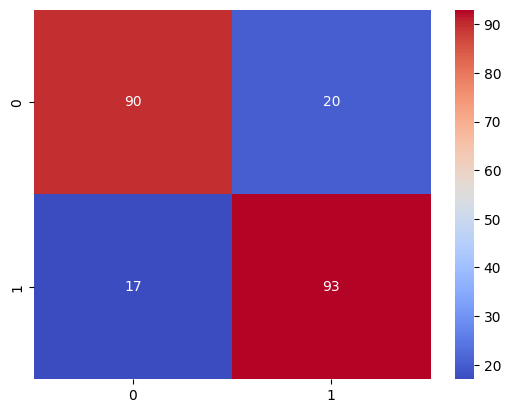

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# üå≥ –î–µ—Ä–µ–≤–æ –ø—Ä–∏–Ω—è—Ç–∏—è —Ä–µ—à–µ–Ω–∏–π (Decision Tree)

–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π ‚Äî —ç—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–π –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∫–∞–∫ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, —Ç–∞–∫ –∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –û–Ω —Ä–∞–±–æ—Ç–∞–µ—Ç –ø–æ –ø—Ä–∏–Ω—Ü–∏–ø—É —Ä–∞–∑–±–∏–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ—Å–Ω–æ–≤–µ —É—Å–ª–æ–≤–∏–π, —Å–æ–∑–¥–∞–≤–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä—É, –ø–æ—Ö–æ–∂—É—é –Ω–∞ –¥–µ—Ä–µ–≤–æ.

üìå –ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º?

	1.	–í—ã–±–∏—Ä–∞–µ—Ç—Å—è –ª—É—á—à–∏–π –ø—Ä–∏–∑–Ω–∞–∫ (—Ñ–∏—á–∞), –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –º–æ–∂–Ω–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ —Ç–∞–∫, —á—Ç–æ–±—ã –∫–ª–∞—Å—Å—ã —Å—Ç–∞–ª–∏ –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª–µ–µ –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã–º–∏.

	2.	–î–∞–Ω–Ω—ã–µ –¥–µ–ª—è—Ç—Å—è –Ω–∞ –¥–≤–µ –∏–ª–∏ –±–æ–ª—å—à–µ –≥—Ä—É–ø–ø –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞.

	3.	–ü—Ä–æ—Ü–µ—Å—Å –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è –¥–ª—è –∫–∞–∂–¥–æ–π –Ω–æ–≤–æ–π –≥—Ä—É–ø–ø—ã, –ø–æ–∫–∞:

	    ‚Ä¢	–õ–∏—Å—Ç (–∫–æ–Ω–µ—á–Ω—ã–π —É–∑–µ–ª –¥–µ—Ä–µ–≤–∞) –Ω–µ —Å—Ç–∞–Ω–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —á–∏—Å—Ç—ã–º.

	    ‚Ä¢	–ì–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞ –Ω–µ –¥–æ—Å—Ç–∏–≥–Ω–µ—Ç —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–æ–≥–æ –ø—Ä–µ–¥–µ–ª–∞.


üöÄ –ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏

‚úÖ –ü–ª—é—Å—ã:

	‚Ä¢	–ü—Ä–æ—Å—Ç–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: –º–æ–∂–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å.
	‚Ä¢	–ú–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –∏ —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏.
	‚Ä¢	–ù–µ —Ç—Ä–µ–±—É–µ—Ç –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö.

‚ùå –ú–∏–Ω—É—Å—ã:

	‚Ä¢	–°–∫–ª–æ–Ω–µ–Ω –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é (overfitting), –æ—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏ –≥–ª—É–±–æ–∫–æ–º –¥–µ—Ä–µ–≤–µ.
	‚Ä¢	–ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ —à—É–º—É –≤ –¥–∞–Ω–Ω—ã—Ö.
	‚Ä¢	–ú–æ–∂–µ—Ç –¥–∞–≤–∞—Ç—å –Ω–µ—É—Å—Ç–æ–π—á–∏–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã (–∏–∑–º–µ–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–µ—Ç —Å–∏–ª—å–Ω–æ –ø–æ–º–µ–Ω—è—Ç—å –¥–µ—Ä–µ–≤–æ).



üõ† –ö—Ä–∏—Ç–µ—Ä–∏–∏ –≤—ã–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è

–ß—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –∫–∞–∫–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è, –∞–ª–≥–æ—Ä–∏—Ç–º –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –º–µ—Ä—ã –Ω–µ–æ–¥–Ω–æ—Ä–æ–¥–Ω–æ—Å—Ç–∏ (—á–µ–º –Ω–∏–∂–µ ‚Äî —Ç–µ–º –ª—É—á—à–µ):

	‚Ä¢	Gini (–∏–Ω–¥–µ–∫—Å –î–∂–∏–Ω–∏) ‚Äì –∏–∑–º–µ—Ä—è–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞.

$Gini = 1 - \sum p_i^2$
–ß–µ–º –º–µ–Ω—å—à–µ Gini, —Ç–µ–º –ª—É—á—à–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ.

	‚Ä¢	Entropy (—ç–Ω—Ç—Ä–æ–ø–∏—è) ‚Äì –∏–∑–º–µ—Ä—è–µ—Ç —Å—Ç–µ–ø–µ–Ω—å –±–µ—Å–ø–æ—Ä—è–¥–∫–∞ –≤ –≤—ã–±–æ—Ä–∫–µ.
$Entropy = - \sum p_i \log_2 p_i$
–ß–µ–º –º–µ–Ω—å—à–µ —ç–Ω—Ç—Ä–æ–ø–∏—è, —Ç–µ–º –ª—É—á—à–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ.

**–ö–æ–¥:**

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=2, max_features=3, random_state=1)
d_tree.fit(X_train, y_train)

y_pred_train = d_tree.predict(X_train)
y_pred_test = d_tree.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')

accuracy train: 0.800
accuracy test: 0.841


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))
plot_tree(d_tree, filled=True, feature_names=features)
plt.show()